In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [10]:
data_path = "../data/Customer-Churn-Records.csv"

In [11]:
data = pd.read_csv(data_path)

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1, inplace = True)

In [6]:
def resumetable(df):    
    print(f'data shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': 'feature'})
    summary['num_NaN'] = df.isnull().sum().values
    summary['num_unique'] = df.nunique().values
    summary['first_value'] = df.iloc[0].values
    summary['second_value'] = df.iloc[1].values
    return summary

In [7]:
resumetable(data)

data shape: (10000, 15)


,feature,data type,num_NaN,num_unique,first_value,second_value
0,CreditScore,int64,0,460,619,608
1,Geography,object,0,3,France,Spain
2,Gender,object,0,2,Female,Female
3,Age,int64,0,70,42,41
4,Tenure,int64,0,11,2,1
5,Balance,float64,0,6382,0.0,83807.86
6,NumOfProducts,int64,0,4,1,1
7,HasCrCard,int64,0,2,1,0
8,IsActiveMember,int64,0,2,1,1
9,EstimatedSalary,float64,0,9999,101348.88,112542.58


We can conclude that this dataset does not include any missing values. Additionally, we identified some categorical variables (Geography, Gender, Tenure, NumberOfProducts, HasCrCard, IsActiveMember). We also need to simplify the column names for easier recognition

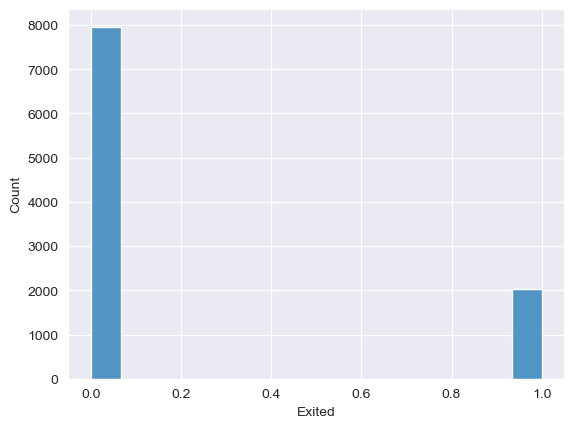

In [8]:
sns.histplot(data['Exited']);

In [9]:
data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

We have a binary outcome here: 1 indicates that the customer left the bank, while 0 means the customer did not. The results suggest that the number of customers who left the bank is four times greater than the number of customers who did not churn based on this dataset.

In [17]:
data['Tenure'].value_counts(sort=True)

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [18]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)